In [1]:
import pandas as pd

In [2]:
masking = pd.read_csv('/home/anopsy/Code/hackher/data/masking.csv')
anxiety = pd.read_csv('/home/anopsy/Code/hackher/data/anxiety.csv')
depression = pd.read_csv('/home/anopsy/Code/hackher/data/depression.csv')
control = pd.read_csv('/home/anopsy/Code/hackher/data/control.csv')

In [3]:
masking.shape

(3230, 1)

In [4]:
anxiety.shape

(2636, 1)

In [5]:
depression.shape

(2236, 1)

In [6]:
control.shape

(2685, 1)

In [7]:
masking.shape

(3230, 1)

In [8]:
anxiety.shape

(2636, 1)

In [9]:
depression.shape

(2236, 1)

In [10]:
control.shape

(2685, 1)

In [11]:
masking["diagnosis"] = "masking"
    

In [12]:
anxiety["diagnosis"] = "anxiety"
depression["diagnosis"] = "depression"
control["diagnosis"] = "control"

In [13]:
masking.columns

Index(['Comment', 'diagnosis'], dtype='object')

In [14]:
control.head

<bound method NDFrame.head of                                                 Comment diagnosis
0     Please do not comment directly to this post un...   control
1     1. sleep just a little bit more than you think...   control
2     **20/40/60 rule**\n\nWhen you're 20, you care ...   control
3       Listening is much more important than speaking.   control
4     You can't save someone who isn't actively tryi...   control
...                                                 ...       ...
2680                       Weird attracts weird bro ✌️👽   control
2681                         Get back out there brother   control
2682                             Nope, it’s from a book   control
2683  You gotta do it! I can’t describe the feeling ...   control
2684                                                how   control

[2685 rows x 2 columns]>

In [15]:
masking['Comment'] = masking['Comment'].str.replace('autism', '')
masking['Comment'] = masking['Comment'].str.replace('autistic', '')
masking['Comment'] = masking['Comment'].str.replace('masking', '')
masking['Comment'] = masking['Comment'].str.replace('spectrum', '')


In [16]:
anxiety['Comment'] = anxiety['Comment'].str.replace('anxiety', '')
anxiety['Comment'] = anxiety['Comment'].str.replace('anxious', '')


In [17]:
depression['Comment'] = depression['Comment'].str.replace('depression', '')
depression['Comment'] = depression['Comment'].str.replace('depressed', '')

In [18]:
df = pd.concat([masking, anxiety, depression, control], axis=0, ignore_index=True)

In [19]:
df.head

<bound method NDFrame.head of                                                  Comment diagnosis
0      Essentially it is  your  traits in order to fi...   masking
1      Autistic people behave in certain ways that ar...   masking
2      Neurotypical people tend to be uncomfortable a...   masking
3      You know how you put a high-powered graphics c...   masking
4      Basically it's when someone who is  suppresses...   masking
...                                                  ...       ...
10782                       Weird attracts weird bro ✌️👽   control
10783                         Get back out there brother   control
10784                             Nope, it’s from a book   control
10785  You gotta do it! I can’t describe the feeling ...   control
10786                                                how   control

[10787 rows x 2 columns]>

In [20]:
df.columns

Index(['Comment', 'diagnosis'], dtype='object')

In [21]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [23]:
# Download the NLTK stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/anopsy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Download the NLTK lemmatizer dictionary
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/anopsy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

In [26]:

# Define a function to preprocess text
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert all words to lower case
    text = text.lower()
    
    # Split the text into words
    words = text.split()
    
    # Remove stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    text = ' '.join(words)
    
    return text


In [27]:
# Apply the preprocessing function to the 'text' column
df['Comment'] = df['Comment'].apply(preprocess_text)

In [28]:
df.head

<bound method NDFrame.head of                                                  Comment diagnosis
0      essentially trait order fit prevalent older pe...   masking
1      autistic people behave certain way obvious non...   masking
2      neurotypical people tend uncomfortable around ...   masking
3      know put high powered graphic card computer pl...   masking
4      basically someone suppresses trait always poss...   masking
...                                                  ...       ...
10782                           weird attracts weird bro   control
10783                                   get back brother   control
10784                                          nope book   control
10785  gotta describe feeling hear drum stick hit dru...   control
10786                                                      control

[10787 rows x 2 columns]>

In [29]:
# Remove rows where the 'Comment' column has fewer than 6 words
df = df[df['Comment'].str.split().str.len() >= 6]

In [30]:
df['len'] = df['Comment'].str.split().str.len()

/tmp/ipykernel_7409/2348831484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['len'] = df['Comment'].str.split().str.len()


In [31]:
df.head

<bound method NDFrame.head of                                                  Comment diagnosis  len
0      essentially trait order fit prevalent older pe...   masking   72
1      autistic people behave certain way obvious non...   masking   96
2      neurotypical people tend uncomfortable around ...   masking   17
3      know put high powered graphic card computer pl...   masking   88
4      basically someone suppresses trait always poss...   masking   16
...                                                  ...       ...  ...
10773  fuck yeah need meet people like used weird wil...   control   24
10776  still kicking seen idea amazing sign year much...   control   14
10780  thank actually sound like something try absolu...   control   13
10781  athletic competitive person activity find phys...   control  102
10785  gotta describe feeling hear drum stick hit dru...   control   14

[7884 rows x 3 columns]>

<Axes: ylabel='Frequency'>

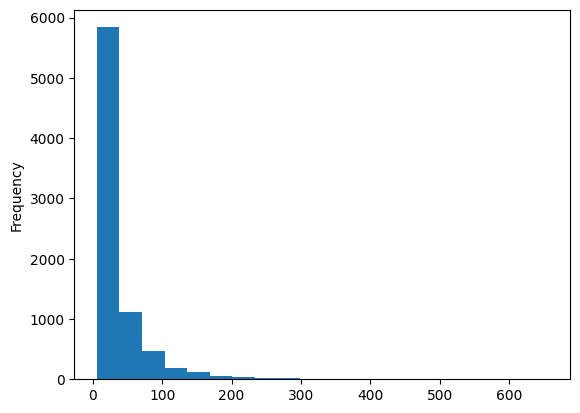

In [32]:
df['len'].plot.hist(bins=20)


In [33]:
df = df[df['Comment'].str.split().str.len() <= 200]

In [34]:
df.shape

(7789, 3)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# Extract features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Comment'])

In [103]:
df.to_csv('all_comments.csv')

In [48]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['diagnosis'], test_size=0.2, random_state=66)

In [49]:
# Train model
model = LinearSVC()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [50]:
# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anxiety       0.73      0.72      0.73       381
     control       0.71      0.68      0.69       343
  depression       0.77      0.71      0.74       352
     masking       0.73      0.81      0.77       482

    accuracy                           0.74      1558
   macro avg       0.74      0.73      0.73      1558
weighted avg       0.74      0.74      0.74      1558



In [51]:
from joblib import dump, load

In [52]:
dump(model, 'baselineSVC_model.joblib') 

['baselineSVC_model.joblib']

In [53]:
loaded_model = load('/home/anopsy/Code/hackher/model/baselineSVC_model.joblib')

In [54]:
experience = input('What is your experience?')
print("")

What is your experience?  I struggle with small talk so I'm often trying to remember what other people were asking or talking about during small talk and I later use same questions or topics


In [59]:
exp_df = pd.DataFrame([experience])


In [60]:
exp_df.columns

RangeIndex(start=0, stop=1, step=1)

In [61]:

vector_input = vectorizer.transform(exp_df[0])

In [62]:
prediction = loaded_model.predict(vector_input)
print(prediction)

['masking']


In [64]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:02
Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.preprocessing import LabelEncoder 
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

In [67]:
le = LabelEncoder()
y = le.fit_transform(df['diagnosis'])

In [68]:
X = vectorizer.fit_transform(df['Comment'])

In [69]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [87]:
params_xgb = {
        'min_child_weight': [1, 5, 10],
        'objective' :['multi:softmax'],
        'gamma': [0, 0.5, 1],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [5, 10, 15],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1],
        'n_estimators' : [500, 700, 1000]
        }

In [88]:
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 2137)

In [89]:
tune_xgb = xgb.XGBClassifier(enable_categorical=True)
rand_xgb = RandomizedSearchCV(tune_xgb, param_distributions=params_xgb, n_iter=60, scoring='accuracy', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=2137)
rand_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=700, objective=multi:softmax, subsample=0.6;, score=0.627 total time= 2.4min
[CV 1/3] END colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=10, n_estimators=700, objective=multi:softmax, subsample=0.6;, score=0.617 total time= 2.6min
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.02, max_depth=15, min_child_weight=10, n_estimators=500, objective=multi:softmax, subsample=0.8;, score=0.636 total time= 5.6min
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=500, objective=multi:softmax, subsample=0.8;, score=0.632 total time= 4.7min
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=1000, objective=multi:softmax, subsample=0.8;, score=0.676 total ti

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7a6060e3b8b0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8],
                                        'gamma': [0, 0.5, 1],
                                        'learning_rate': [0.01, 0.02, 0.05,
                                                          0.1],
                                        'max_depth': [5, 10, 15],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [500, 700, 1000],
                                        'objective': ['multi:softmax'],
                                        'subsample': [0.6, 0.8]},
                   random_state=2137, scoring='accuracy', verbose=3)

[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=700, objective=multi:softmax, subsample=0.6;, score=0.616 total time= 2.4min
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=15, min_child_weight=5, n_estimators=700, objective=multi:softmax, subsample=0.6;, score=0.677 total time= 9.4min
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.02, max_depth=10, min_child_weight=1, n_estimators=700, objective=multi:softmax, subsample=0.6;, score=0.662 total time= 8.1min
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=10, n_estimators=1000, objective=multi:softmax, subsample=0.8;, score=0.649 total time= 8.6min
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=1000, objective=multi:softmax, subsample=0.8;, score=0.627 total time= 7.1min
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learni

In [90]:
rand_xgb_pred = rand_xgb.predict(X_test)

In [91]:
rand_xgb_proba= rand_xgb.predict_proba(X_test)

In [92]:
print(accuracy_score(y_test, rand_xgb_pred))
print(confusion_matrix(y_test, rand_xgb_pred))
print(rand_xgb.best_params_)

0.7028241335044929
[[261  31  26  63]
 [ 20 226  24  73]
 [ 36  28 233  55]
 [ 36  41  30 375]]
{'subsample': 0.8, 'objective': 'multi:softmax', 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.6}
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=700, objective=multi:softmax, subsample=0.8;, score=0.673 total time= 5.9min
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=1000, objective=multi:softmax, subsample=0.8;, score=0.656 total time= 3.3min
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=multi:softmax, subsample=0.6;, score=0.656 total time= 2.4min
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=15, min_child_weight=5, n_estimators=700, objective=multi:softmax, subsample=0.8;, score=0.664 to

In [120]:
experience = input('What is your experience?')
print("")

What is your experience? I don't know how should I react I hide how i feel


In [121]:
exp_df = pd.DataFrame([experience])

In [122]:
vector_input = vectorizer.transform(exp_df[0])

In [135]:
prediction = rand_xgb.predict_proba(vector_input)
anx, con, dep, mas = prediction[0].tolist()
print(f"The probability of this experience to be related to \nAnxiety : {anx:.2f}, \nDepression : {dep:.2f}, \nAutistic Masking : {mas:.2f}, \nunrelated to any of the earlier mentioned disorders : {con:.2f}" )

The probability of this experience to be related to 
Anxiety : 0.41, 
Depression : 0.36, 
Autistic Masking : 0.18, 
unrelated to any of the earlier mentioned disorders : 0.05


In [131]:
print(pred_list)

[[0.4148269295692444, 0.04543282464146614, 0.3626559376716614, 0.17708437144756317]]


In [124]:
prediction = rand_xgb.predict(vector_input)
print(prediction, le.inverse_transform(prediction))


[0] ['anxiety']


In [99]:
best_xgb = xgb.XGBClassifier(**rand_xgb.best_params_)

In [100]:
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [101]:
print(accuracy_score(y_test, best_xgb.predict(X_test)))
print(confusion_matrix(y_test, best_xgb.predict(X_test)))

0.7028241335044929
[[261  31  26  63]
 [ 20 226  24  73]
 [ 36  28 233  55]
 [ 36  41  30 375]]


In [102]:
dump(best_xgb, 'tunedXGB_model.joblib') 

['tunedXGB_model.joblib']